<h1 style="text-align: center;">Desafío - Estimando curvas de densidad de probabilidad</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.

## Habilidades a evaluar
- Conocer las convenciones y principios rectores de la visualización de gráficos.
- Describir la Ley de los Grandes Números y Teorema del Límite Central y su importancia en la inferencia estadística.

## Descripción
La empresa en la cual usted trabaja quedó muy satisfecha con su análisis anterior del Índice de Desarrollo Humano (IDH) de diversos países, el cual se elaboró para el Ministerio de
Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Por consiguiente, esta vez le solicitan que, a partir del trabajo hecho en el Desafío precedente, usted pueda seguir profundizando en la base de datos Quality of Government, de la Universidad de Gotemburgo.

## Requerimientos
A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide realizar.

### 1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la sesión pasada

In [3]:
# Utiliza esta celda para importar módulos y el set de datos
import pandas as pd

df = pd.read_csv('subsample_rb_demo.csv')
df

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,0.406,BDI,SubSaharian,663.57001,NaN,6.8,2.595249,5.41642,24.948179
1,0.938,CHE,WesternDem,50454.41000,8.140,2.1,5.986858,5.09608,84.246483
2,0.828,LVA,EastEurope,16583.67000,2.001,4.4,3.764238,5.28524,94.276611
3,0.706,BLZ,Caribbean,6649.14010,0.350,6.5,2.651881,6.42584,69.326012
4,0.484,TGO,SubSaharian,1036.28000,6.929,7.3,NaN,4.86846,NaN
...,...,...,...,...,...,...,...,...,...
92,0.794,BRB,Caribbean,22888.97100,0.279,5.4,5.040226,6.57330,99.428749
93,0.779,MUS,SubSaharian,10944.54000,1.261,4.2,4.234807,4.91773,83.881760
94,0.799,KWT,NorthAfrica,64342.71100,3.999,3.1,3.075769,NaN,83.578850
95,0.507,ZWE,SubSaharian,15997.67000,12.459,8.0,4.200081,8.42933,44.236969


### 2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
- Generar un archivo `ancilliary_funcs.py` para guardar las funciones creadas en la sesión pasada e importe.
- Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [4]:
# Utiliza esta celda para importar ancilliary_funcs. Recordar que el archivo debe estar en la misma ruta del notebook, y no se debe incluir el .py

from ancilliary_funcs import fecth_descriptives
from ancilliary_funcs import listar_nulos
from ancilliary_funcs import plot_hist
from ancilliary_funcs import dotplot

In [13]:
# Utiliza esta celda para inspeccionar los datos nulos

for variable in df.columns:
    listar_nulos(df, variable)

Cantidad de nulos de undp_hdi: 4
Porcentaje de nulos de undp_hdi: 0.041237113402061855
Cantidad de nulos de ccodealp: 0
Porcentaje de nulos de ccodealp: 0.0
Cantidad de nulos de ht_region: 0
Porcentaje de nulos de ht_region: 0.0
Cantidad de nulos de gle_cgdpc: 2
Porcentaje de nulos de gle_cgdpc: 0.020618556701030927
Cantidad de nulos de imf_pop: 23
Porcentaje de nulos de imf_pop: 0.23711340206185566
Cantidad de nulos de ffp_hf: 10
Porcentaje de nulos de ffp_hf: 0.10309278350515463
Cantidad de nulos de wef_qes: 22
Porcentaje de nulos de wef_qes: 0.2268041237113402
Cantidad de nulos de wdi_expedu: 24
Porcentaje de nulos de wdi_expedu: 0.24742268041237114
Cantidad de nulos de wdi_ners: 24
Porcentaje de nulos de wdi_ners: 0.24742268041237114
Cantidad de nulos de z_gle_cgdpc: 2
Porcentaje de nulos de z_gle_cgdpc: 0.020618556701030927


### 3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
- Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:
$$
\begin{align}
z_i = (x_i - \bar X / \sigma)
\end{align}
$$

- Para ordenar los valores pueden utilizar la función `sort_values` del DataFrame analizado. Lean la documentación asociada al parámetro `by`.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con `dropna`. Lean la documentación asociada al argumento `subset`.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada.

In [5]:
# Utiliza esta celda para generar el puntaje z, ordenar los valores con sort_values, y eliminar los datos nulos con dropna
import warnings
warnings.simplefilter('ignore')     #Para ignorar los warnings

#Se utilizará la variable gle_cgdpc, ya que las otras dos variales que no tienen valores nulos, son variables categoricas y no numéricas.
df_clean = df.dropna(subset = ['gle_cgdpc'])    #Eliminamos los datos nulos de la columna gle_cgdpc

media = df_clean['gle_cgdpc'].mean()    #Obtenemos la media de la variable
desv = df_clean['gle_cgdpc'].std()      #Obtenemos la desviacion estandard de la variable

df_clean['z_gle_cgdpc'] = ((df_clean['gle_cgdpc'] - media) / desv)  #Creamos puntaje z
df_clean = df_clean.sort_values(by=['z_gle_cgdpc'], ascending=True)

In [6]:
# Utiliza esta celda para seleccionar y mostrar las primeras 10 observaciones

df_clean.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,z_gle_cgdpc
77,0.425,COD,SubSaharian,324.16000,NaN,7.1,2.957447,2.24535,NaN,-0.865748
24,0.678,SLV,LatAm,332.26999,NaN,6.9,3.804579,3.44857,70.171722,-0.865357
37,0.351,NER,SubSaharian,644.53998,NaN,6.9,NaN,6.70941,15.665040,-0.850315
0,0.406,BDI,SubSaharian,663.57001,NaN,6.8,2.595249,5.41642,24.948179,-0.849398
86,0.347,CAF,SubSaharian,690.03998,NaN,6.9,NaN,1.22393,13.600750,-0.848123
48,0.511,MDG,SubSaharian,822.62000,NaN,6.1,2.968793,2.08204,31.080410,-0.841736
67,0.414,MOZ,SubSaharian,852.39001,25.733,7.4,2.770460,6.48322,19.439980,-0.840302
54,0.418,ERI,SubSaharian,1007.28000,NaN,7.6,NaN,NaN,28.415560,-0.832840
4,0.484,TGO,SubSaharian,1036.28000,6.929,7.3,NaN,4.86846,NaN,-0.831443
17,0.399,BFA,SubSaharian,1095.96000,16.500,6.9,2.868712,4.60476,26.492809,-0.828569


In [7]:
# Utiliza esta celda para seleccionar y mostrar las últimas 10 observaciones

df_clean.tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,z_gle_cgdpc
36,0.864,BRN,SouthEastAsia,46103.840,0.412000,4.6,4.417221,3.35319,87.032318,1.339568
88,0.920,IRL,WesternDem,46422.070,4.621000,2.8,5.434197,5.32457,99.573357,1.354898
44,0.918,USA,WesternDem,47769.699,318.789001,1.5,4.564571,5.38078,90.462288,1.419816
1,0.938,CHE,WesternDem,50454.410,8.140000,2.1,5.986858,5.09608,84.246483,1.549145
7,0.924,SGP,SouthEastAsia,54268.148,5.470000,3.3,5.797279,2.91579,NaN,1.732862
90,0.948,NOR,WesternDem,57634.770,5.156000,1.6,5.048264,7.37329,95.201927,1.895040
21,0.896,LUX,WesternDem,61404.480,0.550000,2.1,4.580255,4.08388,84.603470,2.076636
94,0.799,KWT,NorthAfrica,64342.711,3.999000,3.1,3.075769,NaN,83.578850,2.218177
31,0.911,LIE,WesternDem,102243.520,NaN,NaN,NaN,2.55604,91.538719,4.043949
16,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,1.02195,NaN,4.344430


**¿Qué características en común se encuentran?**

**Respuesta:** No hay mucho en comun entre las 10 primeras y las 10 ultimas segun el puntaje z. 
* En primer lugar, `ht_region` esta muy marcada. Para las 10 primeras, practicamente solo se obserba la region SubSaharian, en cambio para las ultimas 10, predomina WesternDem.
* En segundo lugar, los valores de `undp_hdi`, `wef_qes` y `wdi_ners` tienden a ser mas bajos en las 10 primeras columnas que en las ultimas 10.
* En tercer lugar, los valores de `ffp_hf` tienden a ser mas altos en las 10 primeras columnas que en las ultimas 10.
* Por ultimo, la variable `ccodealp` no hay mayor comparacion ya que no hay ninguna tendencia. Y las otras columnas possen muchos NaN por lo que no es posible poder sacar alguna conclusion

### 4. Estimar el puntaje z de las regiones (2 puntos). 
Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
- Para ello realice un `dotplot` que muestre el valor promedio de su variable por cada región.
- Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar)

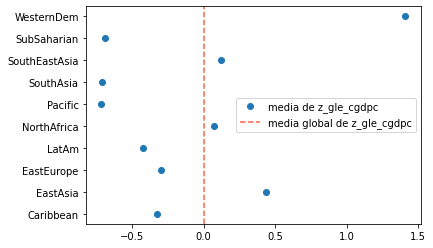

In [8]:
# Utiliza esta celda para realizar el gráfico solicitado

dotplot(df_clean,'z_gle_cgdpc', 'ht_region', statistic = 'mean', global_stat=True)

**Comentarios de los resultados**

NorthAfrica y SouthEastAsia son las region que estan más cercanos a la medía, no asi WestemDem que es la que más lejano se encuentra

### 5. Generar curvas de Densidad de Probabilidad (2 puntos).
- Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables `imf_pop`, `gle_cgdpc` y `wdi_exph`.
- La función debe contener como argumentos:
    - `df`: Tabla de datos.
    - `variable`: Variable a contrastar.

In [21]:
# Utiliza esta celda para definir la función solicitada
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

def densidad_prob(df, variable):
    plt.hist(df[variable], density=True, alpha=0.5)
    # Extraemos los límites del eje x del histograma
    x_min, x_max = plt.xlim()

    # Utilizandos los límites del histograma para crear un arreglo (lista) de 100 valores entre los valores obtenidos previamente
    x_axis = np.linspace(x_min, x_max, 100)

    # Graficamos la curva de densidad empirica (la que tienen los datos), que permite comparar directamente con la curva de densidad teorica (la que tiene en este caso la distribución normal)
    gauss_kde = stats.gaussian_kde(df[variable].dropna())  # Kernel gaussiano                              
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)   # Reshape permite cambiar las dimensiones de una matriz reordenando sus elementos
        
    plt.plot(x_axis, Z, color='blue', lw=2, label="Densidad empírica de los datos")  # Curva de densidad empírica   

    dist = norm(loc=np.mean(df[variable]), scale=np.std(df[variable]))                                      
    x = np.linspace(dist.ppf(0.001),dist.ppf(0.999), 100)
    plt.plot(x, dist.pdf(x), "r-", label="Densidad teórica")   #Curva de densidad teórica

    plt.xlabel(f'Valores de la variable {variable}')
    plt.ylabel('Frecuencia observada')
    plt.title(f'Histograma de la variable {variable} y curvas de densidad')
    plt.legend()

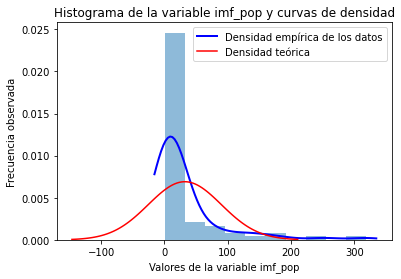

In [22]:
# Utiliza esta celda para llamar la función para imf_pop

densidad_prob(df_clean,'imf_pop')

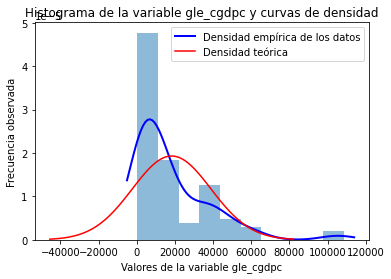

In [23]:
# Utiliza esta celda para llamar la función para gle_cgdpc

densidad_prob(df_clean,'gle_cgdpc')

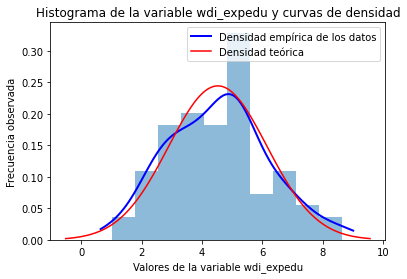

In [24]:
# Utiliza esta celda para llamar la función para wdi_exph

###########################################################
##################### NOTA ################################
###########################################################

# LA VARIABLE wdi_exph NO SE ENECUENTRA EN EL DATASET CREADO, YA QUE SOLO ENTRABA AL DATASET PARA LOS APELLIDOS ENTRE N-Z.
# EN SU REEMPLAZO, SE UTILIZO LA VARIABLE wdi_expedu

densidad_prob(df_clean,'wdi_expedu')